### Imports and definitions

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import struct

In [2]:
class Color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

### Fibonacci Sequence

In [3]:
N = 8

In [4]:
# Print the first N Fibonacci numbers
fib_0 = 0
fib_1 = 1
print(str(fib_0) + '\n' + str((fib_1)))
for i in range(N):
    tmp = fib_1
    fib_1 = fib_0 + fib_1
    fib_0 = tmp
    print(fib_1)

0
1
1
2
3
5
8
13
21
34


In [5]:
# Generate the list of the first N Fibonacci numbers
fib = [0, 1]
for i in range(N):
    fib.append(fib[-1] + fib[-2])

print(fib)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


### Integer Fibonacci coding

In [6]:
N = 5000

values = []
codewords = []

last_valid_value = 0
last_valid_bits = ['0']

for i in range(N):
    
    bits = list(bin(i))[2:]
    count = 0
    keep = True
    for j in range(len(bits)):
        if bits[j] == '1':
            count += 1
            if count >= 2:
                keep = False
                break
        else:
            count = 0
    if keep:
        last_valid_value = i
        last_valid_bits = bits
        
    values.append(last_valid_value) # If a value is not fibonacci-valid we use the last fibonacci-valid value instead
    codewords.append(''.join(last_valid_bits))

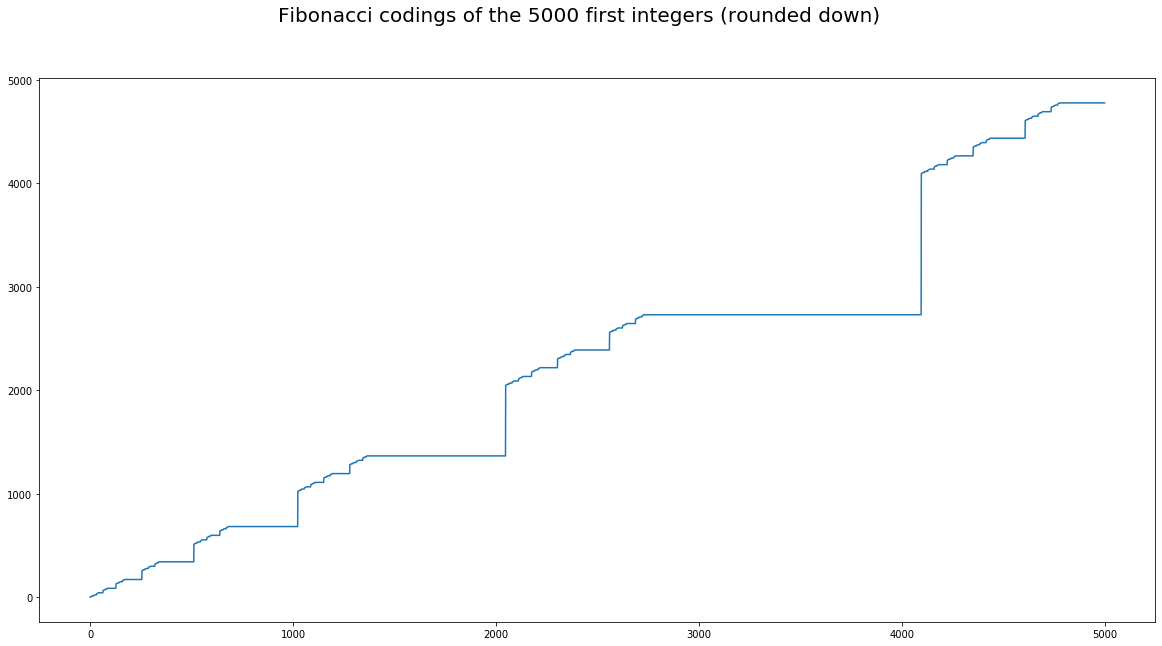

In [7]:
fig = plt.figure(figsize=(20,10))
fig.suptitle("Fibonacci codings of the " + repr(N) + " first integers (rounded down)", fontsize=20)
plt.plot(list(range(N)), values)
plt.show()

In [8]:
N = 5000

values = []
codewords = []

last_valid_value = 0
last_valid_bits = ['0']
count_not_keep = 0

for i in range(N):
    
    bits = list(bin(i))[2:]
    count = 0
    keep = True
    for j in range(len(bits)):
        if bits[j] == '1':
            count += 1
            if count >= 2:
                keep = False
                break
        else:
            count = 0
    if keep:
        last_valid_value = i
        last_valid_bits = bits
        # Change the previous fibonacci-valid values so that they are closer to their actual value
        for j in range(i - (math.floor(count_not_keep/2)), i):
            values[j] = last_valid_value
            codewords[j] = ''.join(last_valid_bits)
        count_not_keep = 0
        
    else:
        count_not_keep += 1
        
    values.append(last_valid_value)
    codewords.append(''.join(last_valid_bits))

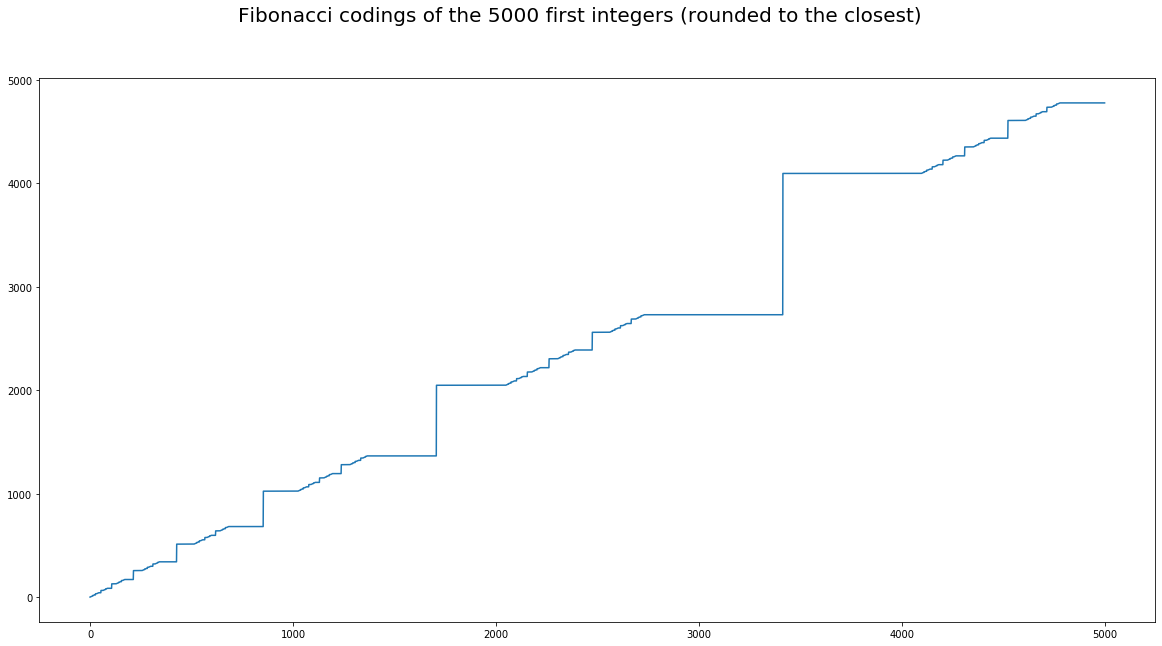

In [9]:
fig = plt.figure(figsize=(20,10))
fig.suptitle("Fibonacci codings of the " + repr(N) + " first integers (rounded to the closest)", fontsize=20)
plt.plot(list(range(N)), values)
plt.show()

### Floating-point (numpy.float32) Fibonacci coding

In [10]:
print("Full precision value = %1.52f" % 2.432);
print("Full precision value = %1.52f" % np.float32(2.432))

Full precision value = 2.4319999999999999396038674603914842009544372558593750
Full precision value = 2.4319999217987060546875000000000000000000000000000000


As we can see python has 64-bits precision for float type numbers. In this section we will use np.float32 numbers instead.

In [11]:
# Gives the 32-bit floating point representation of a number in native python float type (64-bits)
def f32(num):
    return np.float32(num)

In [12]:
# Gives the binary value of a floating point number as a string
def binary(num):
    return ''.join(bin(c).replace('0b', '').rjust(8, '0') for c in struct.pack('!f', num))

In [13]:
# Tests of the binary function, the binary value on the right was obtained using an online float-to-binary converter
assert(binary(f32(0.)) == '00000000000000000000000000000000')
assert(binary(f32(2.432)) == '01000000000110111010010111100011')
assert(binary(f32(-2.432)) == '11000000000110111010010111100011')
assert(binary(f32(-3.4028235E38)) == '11111111011111111111111111111111')
assert(binary(f32(3.4028235E38)) == '01111111011111111111111111111111')
assert(binary(f32(1.4E-45)) == '00000000000000000000000000000001')
assert(binary(f32(-0.0)) == '10000000000000000000000000000000')
print("Tests passed!")

Tests passed!


In [14]:
# Gives the floating point number from its binary string
def float_from_bin(code):
    return f32(struct.unpack('f', struct.pack('I', int(code, 2)))[0])

In [15]:
# Tests of the float_from_bin function
assert(float_from_bin('00000000000000000000000000000000') == f32(0.0))
assert(float_from_bin('01000000000110111010010111100011') == f32(2.432))
assert(float_from_bin('11000000000110111010010111100011') == f32(-2.432))
assert(float_from_bin('11111111011111111111111111111111') == f32(-3.4028235E38))
assert(float_from_bin('01111111011111111111111111111111') == f32(3.4028235E38))
assert(float_from_bin('00000000000000000000000000000001') == f32(1.4E-45))
assert(float_from_bin('10000000000000000000000000000000') == f32(-0.0))
print("Tests passed!")

Tests passed!


In [16]:
# This version only rounds down, need to check if rounding up is better
# Rounding up will give other extreme cases to take care of:
# The exponent part could overflow to the sign part, the mantissa could overflow to the exponent part, the sign could overflow

# Gives the Fibonacci-valid float-32 number that is the closest to our float-32 number 'num'
def fib_code(num):
    code = list(binary(num))
    count = 0
    for i in range(len(code)):
        if code[i] == '1':
            count += 1
            if count >= 2:
                code[i] = '0' # Remove the problem
                # Then we need to make the number as big as possible by placing only 10101010101... until the end of the floating point representation
                one_next = True
                for j in range(i+1, len(code)):
                    if one_next:
                        code[j] = '1'
                        one_next = False
                    else:
                        code[j] = '0'
                        one_next = True
                break
        else:
            count = 0

    code = ''.join(code)
    return float_from_bin(code)

### Testing and current problems

In [17]:
# Test with a few values
numbers = [2.432, 1239481231., 1230412.3210312, 312319., math.pow(2, 17), math.pow(2, 16), 123456.123456, 123.123, 987.987,
          2.2737368E-13, 1.0, 0.0, -2.432, -0.0, -2131231.0, -0.000012391, -1.6434601E-32]
column = 20

print(Color.BLUE + Color.BOLD + "Number".ljust(column) + "Fib down\n".ljust(column) + Color.END)

for n in numbers:
    print((repr(n)).ljust(column) + repr(fib_code(n)).ljust(column))

Number              Fib down
           
2.432               2.3333333           
1239481231.0        5592405.0           
1230412.3210312     873813.3            
312319.0            305834.66           
131072.0            131072.0            
65536.0             3413.3333           
123456.123456       3413.3333           
123.123             85.33333            
987.987             853.3333            
2.2737368e-13       2.2737368e-13       
1.0                 3.0316488e-13       
0.0                 0.0                 
-2.432              -3.0316488e-13      
-0.0                -0.0                
-2131231.0          -3.0316488e-13      
-1.2391e-05         -3.0316488e-13      
-1.6434601e-32      -1.6434601e-32      


In [18]:
abs(math.pow(2, 32) - math.pow(2,33))

4294967296.0

In [19]:
abs(math.pow(2, 32) - 5592405)

4289374891.0

So the Fibonacci-valid number to 2^32 is 5592405 and not 2^33

Also the smallest Fibonacci-valid number is -3.0316488E-13 (which is very close to zero).
This is because we cannot get a positive exponent for negative numbers (because of the leading one).

### Integer (numpy.int32) Fibonacci coding

In [20]:
def binary_int(num, bits=32):
    code = bin(num)[2:]
    if len(code) > bits:
        print("ERROR: num needs more bits")
        return '0' * bits
    else:
        return '0' * (bits-len(code)) + code

In [21]:
def int_from_bin(code):
    return int(code, 2)

In [22]:
# Gives the Fibonacci-valid int number that is the closest (down) to our int number 'num'
def fib_code_int_down(num, bits=32):
    code = list(binary_int(num, bits))
    count = 0
    for i in range(len(code)):
        if code[i] == '1':
            count += 1
            if count >= 2:
                code[i] = '0' # Remove the problem
                # Then we need to make the number as big as possible by placing only 10101010101... until the end of the floating point representation
                one_next = True
                for j in range(i+1, len(code)):
                    if one_next:
                        code[j] = '1'
                        one_next = False
                    else:
                        code[j] = '0'
                        one_next = True
                break
        else:
            count = 0

    code = ''.join(code)
    return int_from_bin(code)

In [23]:
# Gives the Fibonacci-valid int number that is the closest (up) to our int number 'num'
def fib_code_int_up(num, bits=32):
    code = list(binary_int(num, bits))
    count = 0
    for i in range(len(code)):
        if code[i] == '1':
            count += 1
            if count >= 2:

                one_next = True
                for j in range(i-2, -1, -1):
                    if one_next:
                        code[j] = '1'
                        one_next = False
                    else:
                        code[j] = '0'
                        one_next = True
                    if j > 0 and code[j-1] == '0':
                        break;
                
                i -= 1
                while i < len(code):
                    code[i] = '0' # Remove the problem (and all subsequent problems on the right)
                    i += 1
                break
                                
        else:
            count = 0

    code = ''.join(code)
    return int_from_bin(code)

In [24]:
# Gives the best Fibonacci-valid int approximation for 'num'
def fib_code_int(num, bits=32):
    down = fib_code_int_down(num, bits)
    up = fib_code_int_up(num, bits)
    dist_down = abs(num - down)
    dist_up = abs(num - up)
    if dist_down < dist_up:
        return down
    else:
        return up

### Testing and problems

In [25]:
# 32 bits
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000, 2731, 4000, 4095, 4096, 123456]
column = 10

print(Color.BLUE + Color.BOLD + "Number".ljust(column) + "Fib down".ljust(column) + "Fib up".ljust(column) + "Best Fib\n".ljust(column) + Color.END)

for n in numbers:
    print((repr(n)).ljust(column) + repr(fib_code_int_down(n)).ljust(column) + repr(fib_code_int_up(n)).ljust(column) + repr(fib_code_int(n)).ljust(column))

Number    Fib down  Fib up    Best Fib
 
0         0         0         0         
1         1         1         1         
2         2         2         2         
3         2         4         4         
4         4         4         4         
5         5         5         5         
6         5         8         5         
7         5         8         8         
8         8         8         8         
9         9         9         9         
10        10        10        10        
100       85        128       85        
1000      682       1024      1024      
2731      2730      2724      2730      
4000      2730      4096      4096      
4095      2730      4096      4096      
4096      4096      4096      4096      
123456    87381     131072    131072    


It does not work yet with negative numbers. Negative numbers would get very very bad Fibonnaci quantizations given how the 2s complement works in binary.

In [26]:
# 8 bits
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 125, 180, 240, 255]
column = 10
bits = 8

print(Color.BLUE + Color.BOLD + "Number".ljust(column) + "Fib down".ljust(column) + "Fib up".ljust(column) + "Best Fib\n".ljust(column) + Color.END)

for n in numbers:
    print((repr(n)).ljust(column) + repr(fib_code_int_down(n, bits=bits)).ljust(column) + repr(fib_code_int_up(n, bits=bits)).ljust(column) + repr(fib_code_int(n, bits=bits)).ljust(column))

Number    Fib down  Fib up    Best Fib
 
0         0         0         0         
1         1         1         1         
2         2         2         2         
3         2         4         4         
4         4         4         4         
5         5         5         5         
6         5         8         5         
7         5         8         8         
8         8         8         8         
9         9         9         9         
10        10        10        10        
100       85        128       85        
125       85        128       128       
180       170       64        170       
240       170       0         170       
255       170       0         170       


# Tensor coding

In [27]:
import torch
import torch.nn.functional as F

In [28]:
tensor = torch.Tensor(2, 2)

In [29]:
tensor[0, 0] = 23
tensor[0, 1] = 2
tensor[1, 0] = 57
tensor[1, 1] = 98

In [30]:
tensor

tensor([[23.,  2.],
        [57., 98.]])

In [31]:
tensor.byte().apply_(fib_code_int).float()

tensor([[21.,  2.],
        [64., 85.]])

In [32]:
t = torch.Tensor(2, 2)

In [33]:
t[0, 0] = -5.

In [34]:
t.byte()  # Negative numbers overflow when turned into bytes

tensor([[251,   0],
        [  0,   0]], dtype=torch.uint8)

In [35]:
F.relu(t).byte()  # This way, negative weights are turned into 0 instead of overflowing

tensor([[0, 0],
        [0, 0]], dtype=torch.uint8)

In [36]:
t = torch.Tensor(2, 2)

In [37]:
t[0, 0] = -5.
t[1, 0] = 5.
t[0, 1] = -2.
t[1, 1] = 0.

In [38]:
t.char().cpu().float().cuda()

tensor([[-5., -2.],
        [ 5.,  0.]], device='cuda:0')

In [39]:
neg_list = [1 if (value < 0) else 0 for value in t.view(-1)]

In [40]:
neg_list = [1 if (value < 0) else 0 for value in t.view(-1)]

In [41]:
[value for value in t]

[tensor([-5., -2.]), tensor([5., 0.])]

In [42]:
sum(neg_list)

2

In [43]:
len(t.view(-1))

4